# 데이터의 차원을 축소하여 이해하기 쉽게 시각화

## 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://raw.githubusercontent.com/snkn1959/data_source/main/customer_pca.csv'
customer = pd.read_csv(file_url)

In [2]:
customer.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,label
0,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,0
1,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,3
2,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,1
3,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,0
4,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,3


In [3]:
customer_X = customer.drop('label', axis=1) # 독립변수
customer_y = customer['label'] # 종속변수

## 그래프 표현을 위한 차원 축소

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 2개 주성분 설정

In [5]:
pca.fit(customer_X) # 학습
customer_pca = pca.transform(customer_X)

In [6]:
customer_pca

array([[-3.92906072e+00,  1.02604491e-01],
       [ 3.10758276e+00, -1.74887930e+00],
       [ 3.02379272e+00,  3.21221215e+00],
       [-4.28241767e+00,  1.13781030e-02],
       [ 2.59065802e+00, -1.90612064e+00],
       [ 8.70343520e-01, -1.79154348e-02],
       [-1.16508938e+00,  2.00387900e+00],
       [ 1.41163657e+00, -1.21220170e+00],
       [ 1.79302072e-01, -1.15337545e+00],
       [-2.74166293e+00, -3.48112299e-02],
       [ 4.03108363e-01, -2.56426911e-01],
       [-4.32816586e+00,  1.09280479e-01],
       [-1.06779010e+00, -4.71336448e-01],
       [-3.54208654e+00,  2.09373453e-01],
       [ 3.00321739e+00,  6.85140300e-02],
       [ 5.08464052e+00, -1.92234923e+00],
       [-1.39044460e+00,  3.22162225e-01],
       [-2.64318989e+00, -4.59744830e-01],
       [-7.37714393e-01, -9.30393910e-01],
       [-3.93420145e+00,  1.62749639e-01],
       [ 3.16675507e-01, -4.22288613e-01],
       [ 7.31864853e+00,  5.17885391e-02],
       [ 6.60448573e-01, -1.13828656e+00],
       [-3.

In [7]:
# 데이터프레임 형식으로 변환
customer_pca = pd.DataFrame(customer_pca, columns=['PCA1', 'PCA2'])

In [8]:
# label 붙이기
customer_pca = customer_pca.join(customer_y)
customer_pca.head()

,PCA1,PCA2,label
0,-3.929061,0.102604,0
1,3.107583,-1.748879,3
2,3.023793,3.212212,1
3,-4.282418,0.011378,0
4,2.590658,-1.906121,3


<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

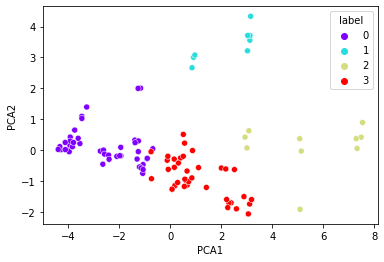

In [9]:
# 산점도 그리기
sns.scatterplot(x='PCA1',
                y='PCA2',
                data=customer_pca, 
                hue='label',
                palette='rainbow')

In [10]:
# 주성분과 변수의 관계 확인
df_comp = pd.DataFrame(pca.components_, columns=customer_X.columns)
df_comp

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,0.348468,0.324472,0.303037,0.141869,0.306183,0.312973,0.297189,0.304582,0.293413,0.302877,0.320534,0.089275
1,0.058276,0.060343,0.152647,-0.544356,0.031095,0.037906,0.238096,-0.231528,-0.247193,-0.208983,0.144790,0.659468


<AxesSubplot:>

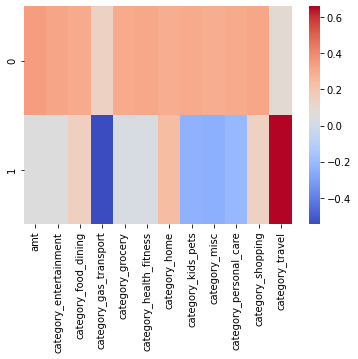

In [12]:
# heatmap
sns.heatmap(df_comp, cmap='coolwarm')